In [1]:
import pandas as pd
import re
from collections import defaultdict as de
dataset = pd.read_csv(r'data\dbamp_100_act_label.csv', index_col = 0)


In [2]:
def dell(d,na):
    for i in na:
        del d[i]
    return d

In [3]:
def gsp_de(d,n):
    name = []
    for k, v in d.items():
        if v<n:
            name.append(k)
    return dell(d, name)

In [4]:
def gsp_cr(d):
    name = []
    for k, v in d.items():
        name.append(k)
    name_new = [i+j[-1] for i in name for j in name if i[1:]==j[:-1]]
    return name_new

In [5]:
def gsp_crdi(name, dataset):
    r = de(int)
    for i in name:
        b=''
        for j in range(len(i)-1):
            b+=i[j]+'.*' 
        b+=i[-1]
        for i in dataset['sequence'].values:
            i_new = i
            res = re.search(b, i_new)
            if not(res==None):
                r[b.replace('.*','')]+=1
    return r

In [6]:
def split(seq):
    return [i for i in seq]

In [ ]:
# 限制條件
# 1. 分type
    ## HIV, ~...

In [7]:
df_antihiv = dataset.loc[dataset.AntiHIV==1,:]
df_antibact = dataset.loc[dataset.Antibacterial==1,:]
df_anticanc = dataset.loc[dataset.Anticancer==1,:]
df_antifung = dataset.loc[dataset.Antifungal==1,:]
df_antimico = dataset.loc[dataset.Antimicrobial==1,:]
df_antiviral = dataset.loc[dataset.Antiviral==1,:]

In [8]:
print(df_antihiv.shape)
print(df_antibact.shape)
print(df_anticanc.shape)
print(df_antifung.shape)
print(df_antimico.shape)
print(df_antiviral.shape)

(699, 9)
(3286, 9)
(1431, 9)
(3383, 9)
(3691, 9)
(1082, 9)


In [9]:
import matplotlib.pyplot as plt

def barh_graph(di, nuu, min_sup):
    if len(di.keys()) > 25:
        data_col = list(di.keys())[-25:]
        data = list(di.values())[-25:]
    else:
        data_col = list(di.keys())
        data = list(di.values())
    plt.barh(data_col, data)
    plt.xlabel("Values")
    plt.ylabel("Frequency")
    plt.title("L" + str(nuu)+' pattern, min_sup: '+ str(min_sup))
    plt.show()

In [10]:
def sort_dict(di):
    return {k: v for k, v in sorted(di.items(), key=lambda item: item[1])}

In [11]:
def analysis_seq(df):
    min_sup = 100
    r_1=[]
    r_1_di = de(int)
    for i in df['sequence'].values:
        for j in set(split(i)):
            r_1_di[j[0]]+=1
    di = gsp_de(r_1_di, min_sup) # min_sup = 2
    print('L1:')
    print(di)
    nuu=1
    barh_graph(di, nuu, min_sup)
    name = []
    for k, v in di.items():
        name.append(k)
    name_new = [i+j for i in name for j in name]
    r_di = gsp_crdi(name_new,df)
    di_3 = gsp_de(r_di,min_sup)
    while(nuu != 5):
        print('L'+str(nuu+1)+':')
        # print(di_3)
        di_3 = sort_dict(di_3)
        barh_graph(di_3, nuu+1, min_sup)
        name_n = gsp_cr(di_3)
        r_di = gsp_crdi(name_n,df)
        try:
            min_sup = list(di_3.values())[-300]
        except:
            min_sup = 100
        di_3 = gsp_de(r_di,min_sup)
        nuu+=1


L1:
defaultdict(<class 'int'>, {'W': 1484, 'Y': 1169, 'F': 2176, 'E': 1195, 'K': 2911, 'V': 2344, 'C': 1442, 'S': 2184, 'T': 1714, 'N': 1702, 'D': 1238, 'G': 2644, 'A': 2445, 'R': 1833, 'P': 1652, 'L': 2891, 'H': 1111, 'Q': 1233, 'M': 896, 'I': 2594})


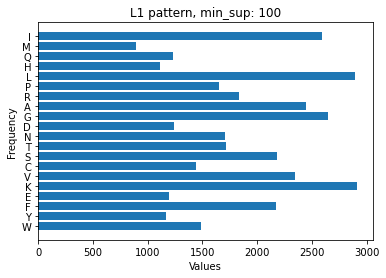

L2:


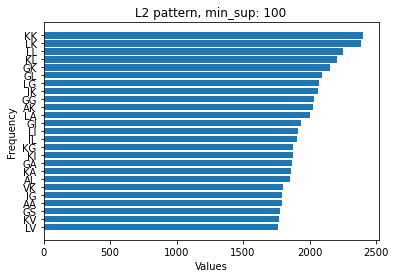

L3:


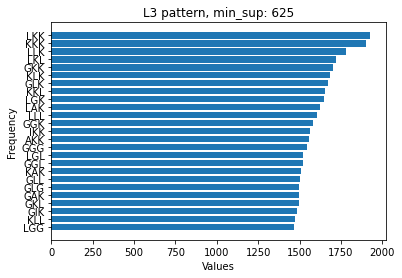

L4:


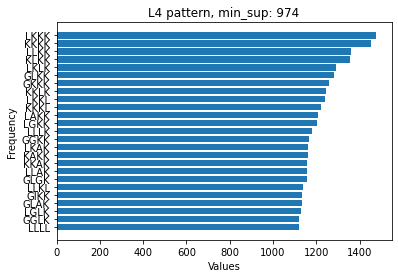

L5:


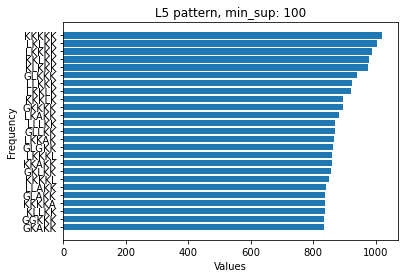

L6:


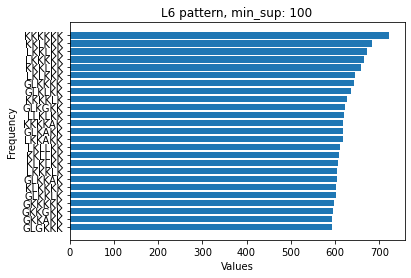

In [93]:
analysis_seq(df_antibact)

L1:
defaultdict(<class 'int'>, {'F': 857, 'C': 292, 'P': 547, 'R': 731, 'I': 951, 'N': 442, 'K': 1160, 'A': 848, 'L': 1152, 'H': 307, 'Q': 285, 'D': 288, 'Y': 332, 'V': 728, 'G': 881, 'M': 225, 'W': 663, 'T': 500, 'E': 290, 'S': 608, 'X': 114})


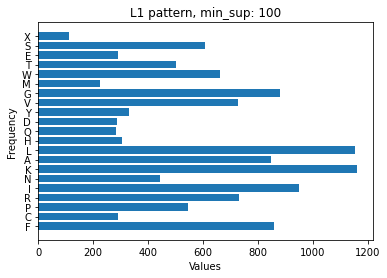

L2:


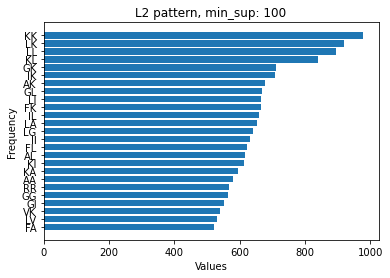

L3:


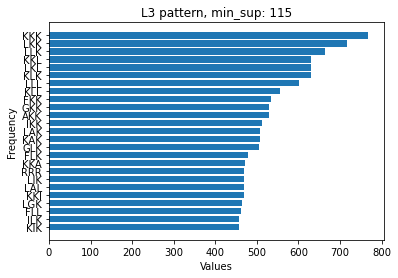

L4:


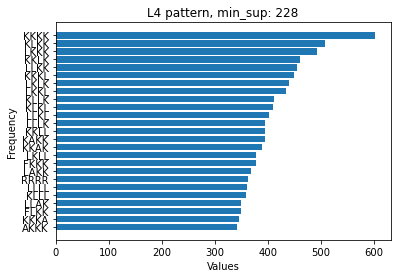

L5:


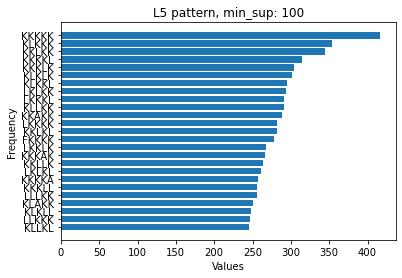

In [12]:
analysis_seq(df_anticanc)

L1:
defaultdict(<class 'int'>, {'C': 241, 'P': 377, 'Q': 346, 'R': 370, 'I': 529, 'N': 389, 'S': 472, 'T': 431, 'A': 492, 'L': 607, 'E': 514, 'G': 438, 'H': 215, 'M': 169, 'V': 463, 'K': 509, 'F': 332, 'W': 380, 'D': 336, 'Y': 304})


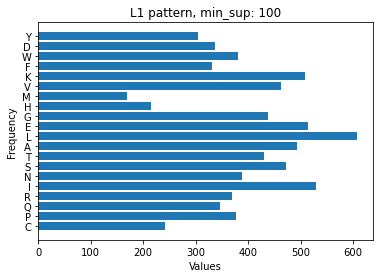

L2:


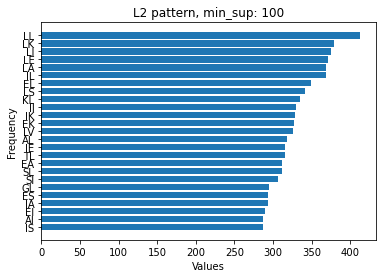

L3:


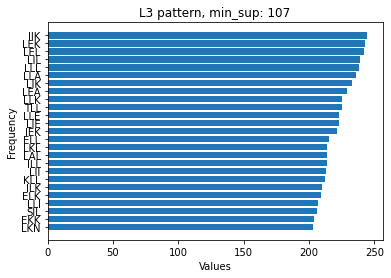

L4:


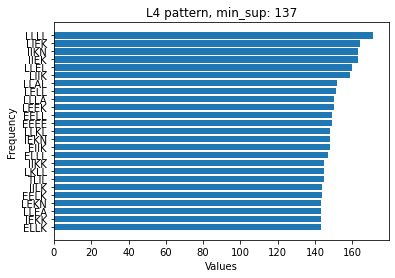

L5:


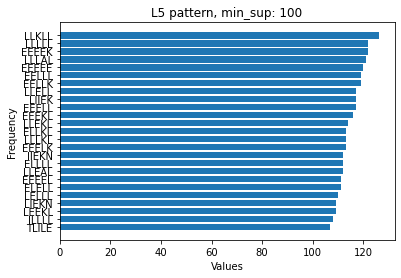

In [13]:
analysis_seq(df_antihiv)

L1:
defaultdict(<class 'int'>, {'F': 2412, 'C': 1494, 'R': 1932, 'S': 2275, 'N': 1743, 'D': 1236, 'K': 3181, 'Y': 1191, 'W': 1609, 'V': 2528, 'T': 1781, 'A': 2690, 'E': 1186, 'G': 2870, 'P': 1712, 'Q': 1186, 'H': 1102, 'I': 2723, 'M': 833, 'L': 3204})


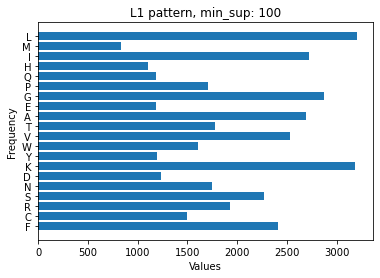

L2:


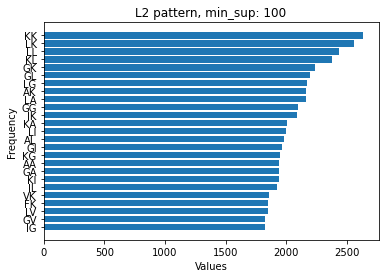

L3:


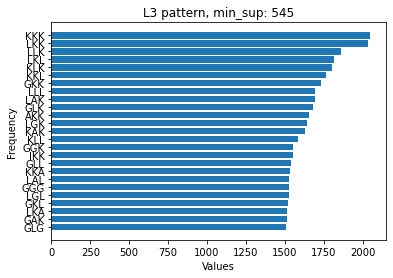

L4:


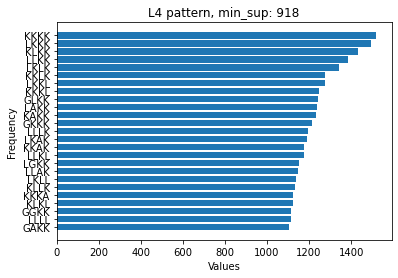

L5:


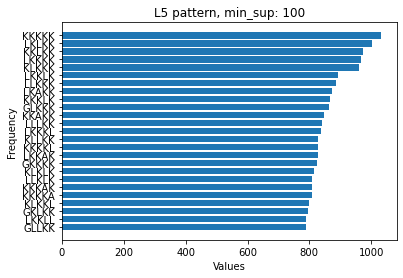

In [14]:
analysis_seq(df_antimico)

L1:
defaultdict(<class 'int'>, {'F': 643, 'P': 452, 'H': 362, 'R': 551, 'Q': 537, 'I': 758, 'D': 526, 'S': 651, 'Y': 534, 'V': 748, 'T': 626, 'A': 738, 'L': 938, 'E': 610, 'G': 647, 'N': 563, 'K': 851, 'W': 493, 'C': 365, 'M': 281})


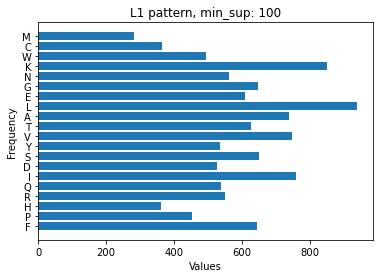

L2:


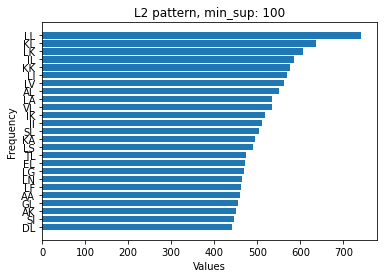

L3:


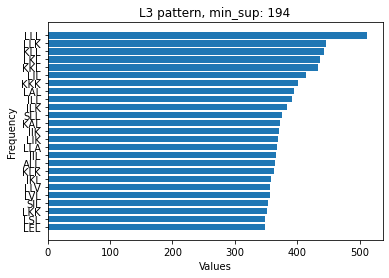

L4:


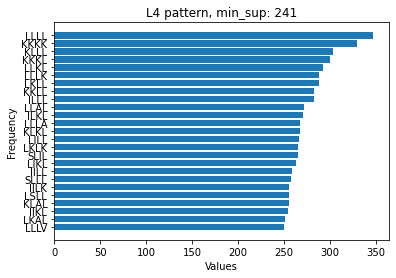

L5:


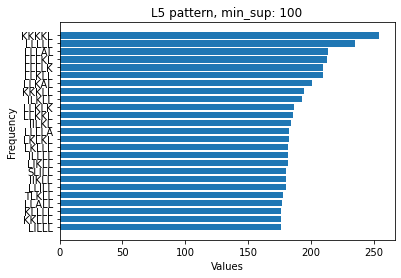

In [15]:
analysis_seq(df_antiviral)

L1:
defaultdict(<class 'int'>, {'F': 2189, 'L': 2875, 'C': 1323, 'P': 1527, 'Q': 1156, 'R': 1948, 'H': 1055, 'D': 1123, 'N': 1517, 'S': 2007, 'K': 2898, 'Y': 1139, 'V': 2214, 'T': 1585, 'A': 2435, 'I': 2409, 'G': 2647, 'W': 1185, 'E': 1079, 'M': 790, 'X': 252})


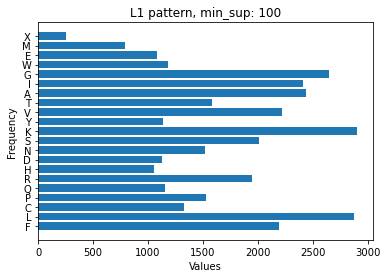

L2:


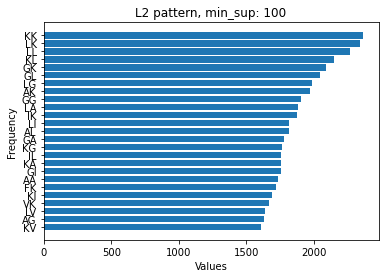

L3:


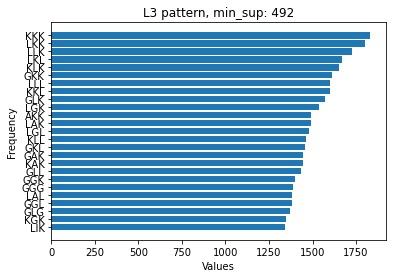

L4:


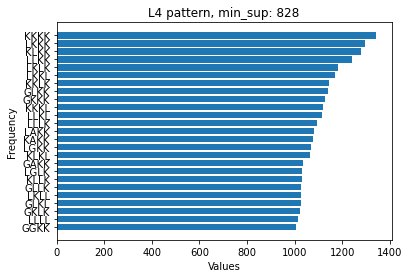

L5:


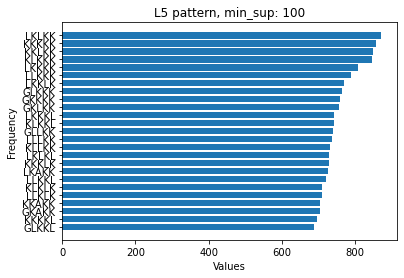

In [16]:
analysis_seq(df_antifung)